Business Problem :
The hotel wants to understand booking behavior and cancellations to improve revenue and occupancy.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [80]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'hotel_bookings 2.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [81]:
df.shape

(119390, 32)

In [82]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [84]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [85]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [86]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Data Cleaning**

In [88]:
df['children'] = df['children'].fillna(0)

In [89]:
df['country'] = df['country'].fillna('Unknown')

In [90]:
df['agent'] = df['agent'].fillna(0)

In [91]:
df.drop(['company'],axis = 1,inplace = True)

In [92]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [93]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [94]:
canceled_perc = df['is_canceled'].value_counts(normalize = True)*100
canceled_perc

is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64

**Nearly 37% of hotel bookings are canceled, which represents a significant revenue risk.**

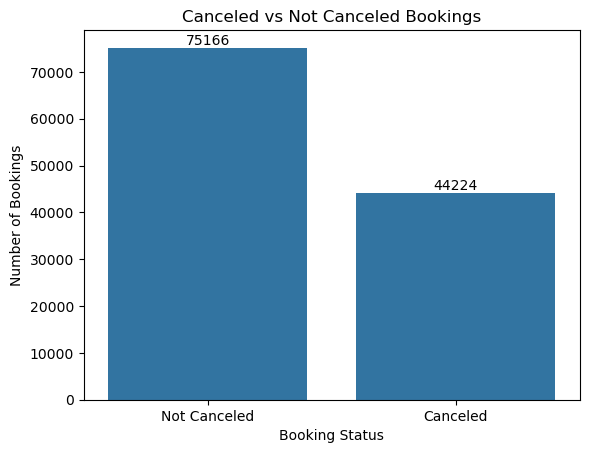

In [95]:
ax = sns.countplot(x='is_canceled', data=df)
ax.set_xticklabels(['Not Canceled', 'Canceled'])
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.title('Canceled vs Not Canceled Bookings')


for container in ax.containers:
    ax.bar_label(container)

plt.show()


**From the above chart we can see that ~37% bookings were canceled which indicates a significant cancellation issue that could impact hotel's revenue.**

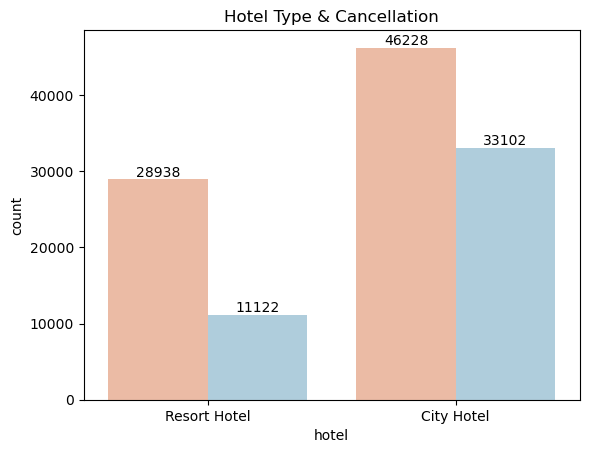

In [96]:
ax = sns.countplot(x = 'hotel',hue = 'is_canceled',data = df,palette = 'RdBu',legend = False)
plt.title("Hotel Type & Cancellation")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**From the above chart, we can see that city hotels experience significantly higher bookings as well as higher cancellation counts compared to resort hotels.Meanwhile, in resort hotels show relatively lower cancellation levels, which may indicate more committed travel plans and longer stays.**

In [97]:
avg_lead = df.groupby('is_canceled')['lead_time'].mean()
avg_lead

is_canceled
0     79.984687
1    144.848815
Name: lead_time, dtype: float64

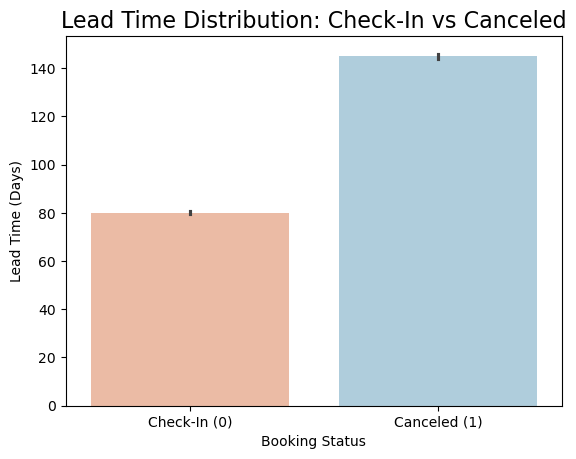

In [98]:
sns.barplot(x = 'is_canceled',y='lead_time',hue='is_canceled',palette = 'RdBu',data = df,legend = False)
plt.title("Lead Time Distribution: Check-In vs Canceled", fontsize=16)
plt.xticks([0, 1], ['Check-In (0)', 'Canceled (1)'])
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (Days)")
plt.show()

**From the above chart, we can see that bookings with longer lead times are more likely to be canceled.On average, canceled bookings are made almost twice as early as non-canceled bookings. This suggests that customers who book far in advance are more uncertain about their travel plans.**

In [99]:
avg_adr = df.groupby('is_canceled')['adr'].mean().reset_index()
avg_adr

,is_canceled,adr
0,0,99.987693
1,1,104.964333


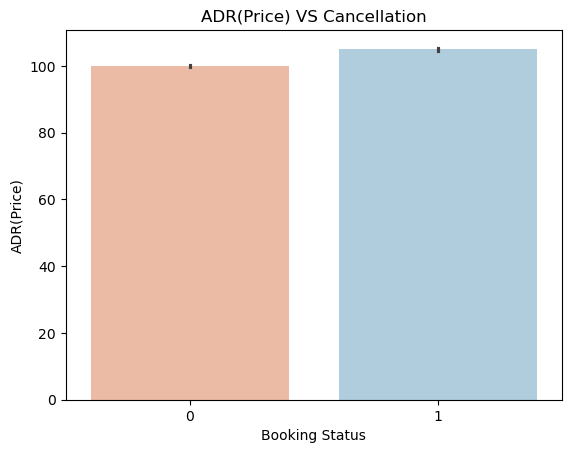

In [100]:
sns.barplot(x = 'is_canceled', y = 'adr', hue = 'is_canceled',data = df,palette = 'RdBu',legend = False)
plt.title("ADR(Price) VS Cancellation")
plt.xlabel("Booking Status")
plt.ylabel("ADR(Price)")
plt.show()

**From the above chart, we can see that bookings with higher average daily rates (ADR) are slightly more likely to be canceled. This suggests that customers may be more price-sensitive for expensive bookings, leading to higher cancellation tendencies when costs increase.**

In [101]:
peak_canc = df.groupby('arrival_date_month')['is_canceled'].sum().sort_values(ascending = False).reset_index()
peak_canc

,arrival_date_month,is_canceled
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


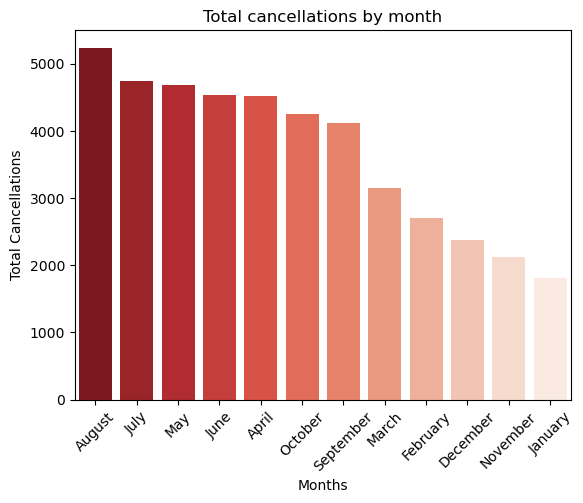

In [102]:
sns.barplot(x = 'arrival_date_month', y = 'is_canceled',data = peak_canc,hue = 'arrival_date_month',palette = 'Reds_r')
plt.xlabel("Months")
plt.ylabel("Total Cancellations")
plt.title("Total cancellations by month")
plt.xticks(rotation = 45)
plt.show()

**The above chart reveals a strong seasonal pattern in booking cancellations, with the highest number of cancellations occurring during May–August. Meanwhile, winter months such as January and November show significantly lower cancellations.**

In [103]:
cust_canc = df.groupby('customer_type')['is_canceled'].sum().sort_values(ascending = False).reset_index()
cust_canc

,customer_type,is_canceled
0,Transient,36514
1,Transient-Party,6389
2,Contract,1262
3,Group,59


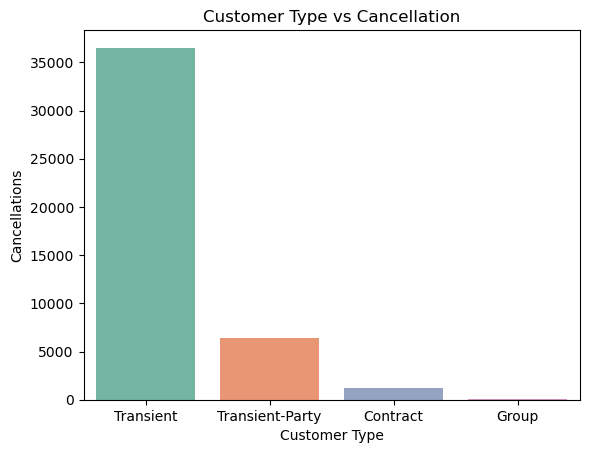

In [104]:
sns.barplot(x = 'customer_type', y = 'is_canceled', data = cust_canc,hue = 'customer_type',palette = 'Set2')
plt.xlabel("Customer Type")
plt.ylabel("Cancellations")
plt.title("Customer Type vs Cancellation")
plt.show()

**The above chart shows that Transient customers are the major segment of people of booking cancellations, significantly higher than all other customer segments.Meanwhile, Contract and Group customers show extremely low cancellation rates, suggesting more stable and committed bookings.**

**CONCLUSION  :**
**Nearly 37% of bookings are canceled, posing a major revenue risk.**
**City hotels experience higher cancellations than resort hotels.**
**Long lead-time and high-ADR bookings show higher cancellation tendencies.**
**May - August months have the highest cancellation volume.**
**Transient customers have the most cancellations.**